In [16]:
import os
import sys
import json
sys.path.append(os.path.abspath(os.path.join('..', '..')))  # Adds the root of the project to PYTHONPATH

import torch
import torch.nn as nn

from src.layers.pooling_layers import pickPoolLayer
# Import models:
from src.models.LeNetPlus import LeNetPlus
from src.models.VGG import vgg16_bn_small
from src.models.SupervisedNiNPlus import SupervisedNiNPlus
from src.models.DenseNetPlus import DenseNetPlus

from src.model_tools.evaluate import evaluate
from src.data.load_data import load_dataset

### Printing loss surface plots (LeNet):

In [9]:
import numpy as np
import matplotlib.pyplot as plt

PATH_PLOTS = os.path.join('..', '..', 'reports', 'plots')

loss_surface_np = np.loadtxt(os.path.join(PATH_PLOTS, 'loss_surface_lenet'), delimiter=',')
alphas = np.arange(-1, 1, 0.1)
betas = np.arange(-1, 1, 0.1)

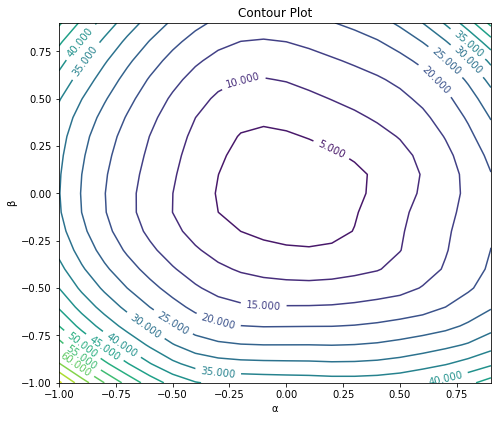

In [10]:
# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
# ax = fig.add_axes()

cp = ax.contour(alphas, betas, loss_surface_np, levels=15)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
plt.show()
fig.savefig(os.path.join(PATH_PLOTS, 'loss_surface_lenet_grouping_product.pdf'), bbox_inches="tight")
fig.savefig(os.path.join(PATH_PLOTS, 'loss_surface_lenet_grouping_product.png'), bbox_inches="tight")

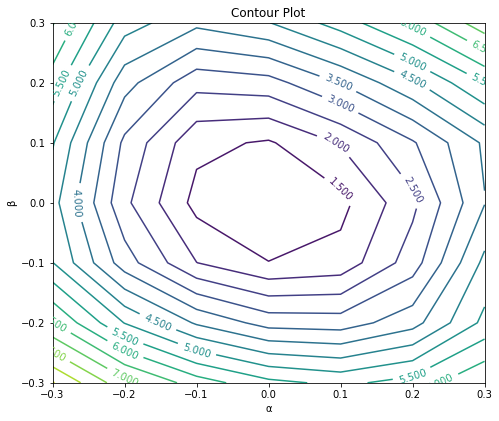

In [11]:
# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
# ax = fig.add_axes()

cp = ax.contour(alphas[7:14], betas[7:14], loss_surface_np[7:14, 7:14], levels=15)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
plt.show()
fig.savefig(os.path.join(PATH_PLOTS, 'loss_surface_closeup_lenet_grouping_product.pdf'), bbox_inches="tight")
fig.savefig(os.path.join(PATH_PLOTS, 'loss_surface_closeup_lenet_grouping_product.png'), bbox_inches="tight")

In [12]:
acc_surface_np = np.loadtxt(os.path.join(PATH_PLOTS, 'acc_surface_lenet'), delimiter=',')
alphas = np.arange(-1, 1, 0.1)
betas = np.arange(-1, 1, 0.1)

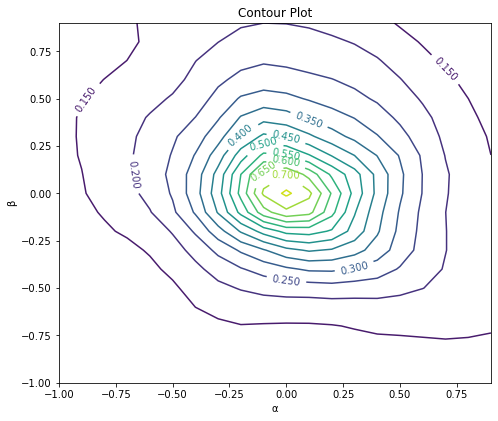

In [46]:
# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
# ax = fig.add_axes()

cp = ax.contour(alphas, betas, acc_surface_np, levels=15)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
plt.show()
fig.savefig(os.path.join(PATH_PLOTS, 'acc_surface_lenet_grouping_product.pdf'), bbox_inches="tight")
fig.savefig(os.path.join(PATH_PLOTS, 'acc_surface_lenet_grouping_product.png'), bbox_inches="tight")

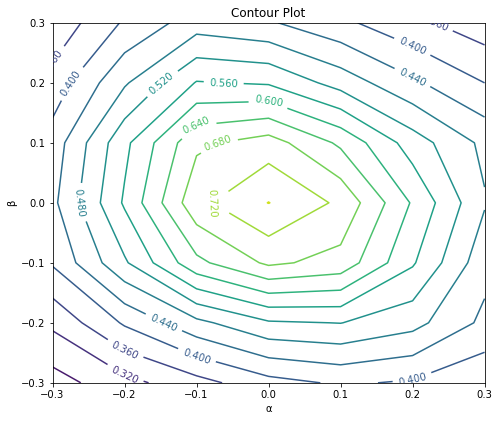

In [47]:
# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
# ax = fig.add_axes()

cp = ax.contour(alphas[7:14], betas[7:14], acc_surface_np[7:14, 7:14], levels=15)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
plt.show()
fig.savefig(os.path.join(PATH_PLOTS, 'acc_surface_closeup_lenet_grouping_product.pdf'), bbox_inches="tight")
fig.savefig(os.path.join(PATH_PLOTS, 'acc_surface_closeup_lenet_grouping_product.png'), bbox_inches="tight")

### Generating plots for VGG16_small

In [17]:
import numpy as np
import matplotlib.pyplot as plt

PATH_PLOTS = os.path.join('..', '..', 'reports', 'plots')

loss_surface_np = np.loadtxt(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_loss_surface.csv'), delimiter=',')
alphas = np.arange(-1, 1.01, 0.1)
betas = np.arange(-1, 1.01, 0.1)

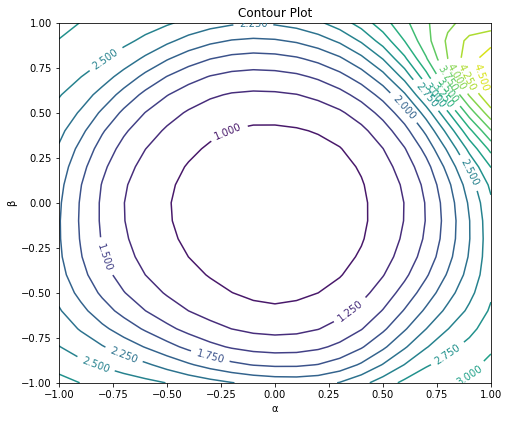

In [6]:
# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
# ax = fig.add_axes()

cp = ax.contour(alphas, betas, loss_surface_np, levels=15)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
plt.show()
fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_loss_surface.pdf'), bbox_inches="tight")
fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_loss_surface.png'), bbox_inches="tight")

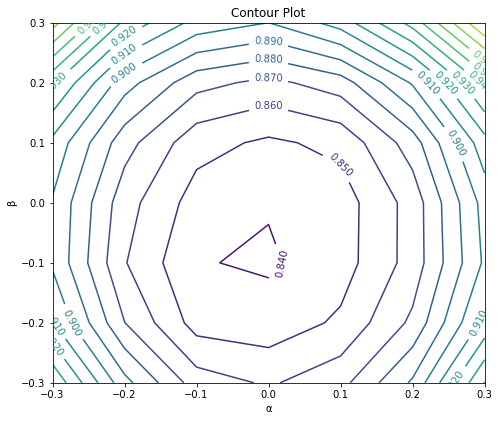

In [7]:
# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
# ax = fig.add_axes()

cp = ax.contour(alphas[7:14], betas[7:14], loss_surface_np[7:14, 7:14], levels=15)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
plt.show()
fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_loss_surface_closeup.pdf'), bbox_inches="tight")
fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_loss_surface_closeup.png'), bbox_inches="tight")

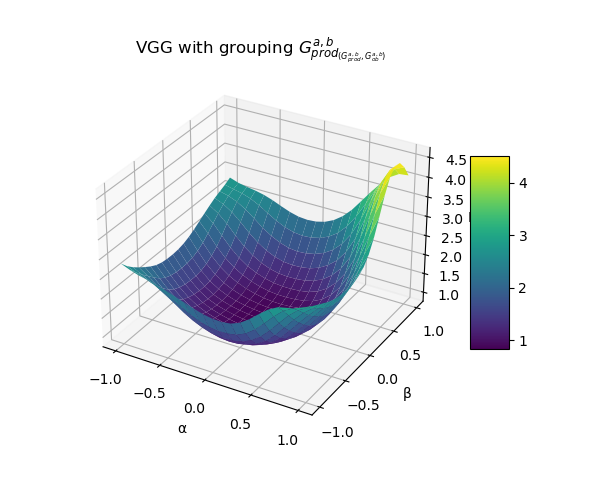

In [50]:
%matplotlib widget

# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
# left, bottom, width, height = 0, 0, 1, 1
# ax = fig.add_axes([left, bottom, width, height]) 
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(alphas, betas)
surface = ax.plot_surface(X, Y, loss_surface_np, cmap=plt.cm.viridis)
# cp = ax.contour(alphas, betas, loss_surface_np, levels=15)
# ax.clabel(cp, inline=True, fontsize=10)

ax.set_title(r'VGG with grouping $G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
ax.set_zlabel('Loss')

fig.colorbar(surface, shrink=0.5, aspect=5)

plt.show()
# fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_loss_surface.pdf'), bbox_inches="tight")
# fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_loss_surface.png'), bbox_inches="tight")

### Generating plots for VGG16_small (Comp_prod_prodAndOB - Test 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

PATH_PLOTS = os.path.join('..', '..', 'reports', 'plots')

loss_surface_np = np.loadtxt(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_test_3_loss_surface.csv'), delimiter=',')
alphas = np.arange(-1, 1.01, 0.1)
betas = np.arange(-1, 1.01, 0.1)

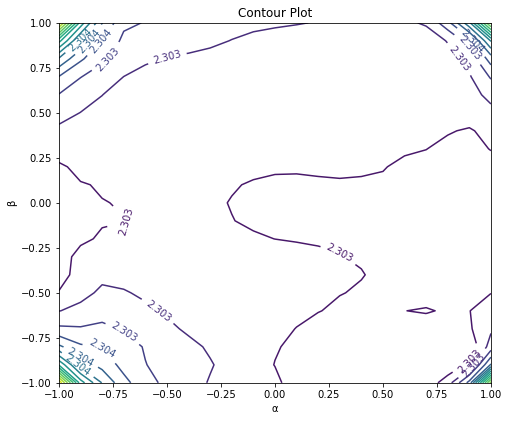

In [2]:
# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
# ax = fig.add_axes()

cp = ax.contour(alphas, betas, loss_surface_np, levels=15)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
plt.show()
fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_test_3_loss_surface.pdf'), bbox_inches="tight")
fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_test_3_loss_surface.png'), bbox_inches="tight")

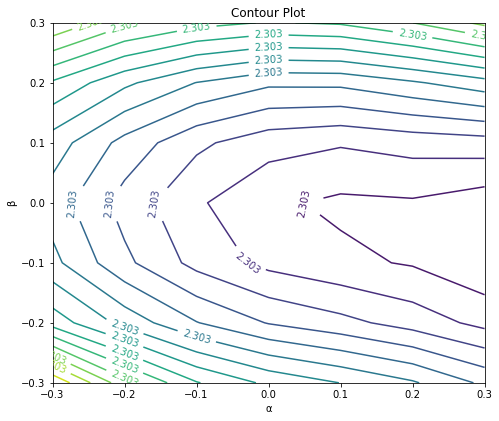

In [3]:
# Generate visualization using PyPlot   
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0, 0, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
# ax = fig.add_axes()

cp = ax.contour(alphas[7:14], betas[7:14], loss_surface_np[7:14, 7:14], levels=15)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('\u03B1')
ax.set_ylabel('\u03B2')
plt.show()
fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_test_3_loss_surface_closeup.pdf'), bbox_inches="tight")
fig.savefig(os.path.join(PATH_PLOTS, 'vgg16_small_CIFAR__pool_comp_prod_prodAndOB_test_3_loss_surface_closeup.png'), bbox_inches="tight")

In [ ]:
acc_surface_np = np.loadtxt(os.path.join(PATH_PLOTS, 'acc_surface_lenet'), delimiter=',')
alphas = np.arange(-1, 1, 0.1)
betas = np.arange(-1, 1, 0.1)

# Additional tests

In [2]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

CONFIG_PATH = os.path.join('..', '..', 'config')
config_file_name = 'default_parameters.json'
dataset = 'CIFAR10'

In [3]:
model_type='vgg16_small'
pool_type = 'grouping_product'

In [4]:
with open(os.path.join(CONFIG_PATH, config_file_name)) as config_file:
    config_data = json.load(config_file)
    # Train loop configuration:
    train_params = config_data['train_params']
    num_epochs = train_params['num_epochs']
    batch_size = train_params['batch_size']

    dataset_params = config_data['dataset_params'][dataset]
    input_size = dataset_params['input_size']
    num_classes = dataset_params['num_classes']
    train_proportion = dataset_params['train_proportion']
    num_workers = dataset_params['num_workers']
    model_params = config_data['model_params'][model_type]

    if model_type == 'lenet':
        use_batch_norm = model_params['use_batch_norm']

    scheduler_factor = model_params['scheduler_factor']
    scheduler_min_lr = model_params['scheduler_min_lr']
    optimizer_name = model_params['optimizer']
    learning_rate = model_params['learning_rate']
    weight_decay = model_params['weight_decay']
    momentum = model_params['momentum']


In [5]:
    # train_dataloader, val_dataloader = load_dataset(dataset, batch_size, train=True,
    #                                                 train_proportion=train_proportion,
    #                                                 val=True, num_workers=num_workers)
    # test_dataloader = load_dataset(dataset, batch_size, train=False, num_workers=num_workers)
    
    # 2. Model initialization:
    pool_layer = pickPoolLayer(pool_type)

    if model_type == 'lenet': 
        model = LeNetPlus(input_size, num_classes, pool_layer=pool_layer, use_batch_norm=use_batch_norm)
    elif model_type == 'nin':
        model = SupervisedNiNPlus(pool_layer, in_channels=input_size[-1], num_classes=num_classes, input_size=input_size[:-1], initial_pool_exp=initial_pool_exp)
    elif model_type == 'dense':
        model = DenseNetPlus(pool_layer=pool_layer, in_channels=input_size[-1], num_classes=num_classes)
    # elif model_type == 'vgg16':
    #     model = vgg16_bn(pool_layer=pool_layer, num_classes=num_classes)
        # model = vgg16(pool_layer=pool_layer, num_classes=num_classes)
    elif model_type == 'vgg16_small':
        model = vgg16_bn_small(pool_layer=pool_layer, num_classes=num_classes)
    else:
        raise Exception('Non implemented yet.')
    model.to(device)

VGG_small(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): GroupingPool2d()
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): GroupingPool2d()
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affin

Generate random directions:

In [6]:
center_point = []
    
excluded_parameter_types = [nn.BatchNorm2d]

# Get the parameters of the model:
directions1 = []
directions2 = []
parameters = []
modules = model.modules()
prev_module = next(modules) # Get rid of Linear, since modules is a (consumable) iterable
for module in modules:
    if ((type(module) != nn.Sequential)) and (len(module._modules) == 0):# or (type(module) in custom_capsule_module_types):
        for param in module.parameters():
            parameters.append(param.clone().detach())
            if type(module) in excluded_parameter_types:
                new_direction1 = param.data.new_zeros(param.data.shape)
                new_direction2 = param.data.new_zeros(param.data.shape)
            else:
                new_direction1 = torch.rand(param.data.shape, device=param.data.device, dtype=param.data.dtype)
                new_direction2 = torch.rand(param.data.shape, device=param.data.device, dtype=param.data.dtype)
                # while torch.abs(torch.cosine_similarity(new_direction1, new_direction2)) < 0.5:
                    # Regenerate the second random direction (we want them to be different)
                     # new_direction2 = torch.rand(param.data.shape, device=param.data.device, dtype=param.data.dtype)
                # TODO: Filterwise normalization:
            directions1.append(new_direction1)  # We could also append something like [type(param), new_direction1]
            directions2.append(new_direction2)

In [13]:
def set_model_parameters(model, parameters, directions1, directions2, alpha=0, beta=0):
    modules = model.modules()
    module = next(modules) # Get rid of Linear, since modules is a (consumable) iterable
    param_idx = 0
    with torch.no_grad():
        for module in modules:
            if ((type(module) != nn.Sequential)) and (len(module._modules) == 0):# or (type(module) in custom_capsule_module_types):
                for param in module.parameters():
                    new_value = parameters[param_idx] + alpha * directions1[param_idx] + beta * directions2[param_idx]
                    param.copy_(new_value)
                    param_idx += 1
    return model

Prepare the evaluation dataset:

In [17]:
_, test_loader = load_dataset(dataset, batch_size, val=False, num_workers=num_workers)
criterion = nn.CrossEntropyLoss()

NameError: name 'load_dataset' is not defined

In [15]:
import numpy as np

acc_surface = []
loss_surface = []
for alpha in np.arange(-1, 1, 0.1):
    acc_row = []
    loss_row = []
    for beta in np.arange(-1, 1, 0.1):
        model = set_model_parameters(model, parameters, directions1, directions2, alpha=alpha, beta=beta)
        accuracy, loss = evaluate(model, criterion, test_loader=test_loader)
        acc_row.append(accuracy)
        loss_row.append(loss)
    acc_surface.append(acc_row)
    loss_surface.append(loss_row)

Parameter containing:
tensor([[[[-0.9626, -1.3991, -0.9875],
          [-1.5478, -1.0601, -1.4093],
          [-0.3997, -0.0657, -1.0441]],

         [[-0.1283, -1.0391, -0.7946],
          [-1.1649, -0.8176, -1.9295],
          [-1.4423, -1.3201, -1.4545]],

         [[-1.1566, -1.3720, -1.7238],
          [-1.3564, -1.0545, -1.4898],
          [-0.7164, -1.4147, -1.0398]]],


        [[[-1.7214, -0.9556, -0.3835],
          [-0.6632, -1.1299, -1.2564],
          [-1.1060, -0.4990, -0.3968]],

         [[-1.4863, -0.9523, -0.0966],
          [-1.3159, -1.2737, -1.5881],
          [-0.7855, -1.8413, -1.3583]],

         [[-1.1559, -1.4418, -0.6082],
          [-1.3536, -0.9433, -1.4577],
          [-1.3599, -0.3650, -1.4498]]],


        [[[-1.7368, -0.6961, -0.8360],
          [-1.7896, -1.5730, -0.2121],
          [-1.6721, -0.7843, -0.1695]],

         [[-0.8967, -1.0607, -1.0219],
          [-0.5685, -1.1183, -0.9010],
          [-1.6846, -1.1097, -0.8355]],

         [[-1.2377, -0

KeyboardInterrupt: 

In [22]:
prueba = torch.ones([5, 2, 4], dtype=torch.float)
prueba2 = prueba.new_zeros(prueba.shape)
print(prueba)
print(prueba2)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [23]:
# 1. Data loading:
    # if dataset == 'CIFAR10':
    train_dataloader, val_dataloader, test_dataloader = load_dataset(dataset, batch_size, 
                                                                        train_proportion=train_proportion, 
                                                                        val=True, num_workers=num_workers)

IndentationError: unexpected indent (<ipython-input-23-182d2ffd41a9>, line 3)